In [1]:
# import speech raw text
from cltk import NLP
cltk_nlp = NLP(language="lat")
# Removing ``LatinLexiconProcess`` for this demo b/c it is slow (adds ~9 mins total)
cltk_nlp.pipeline.processes.pop(-1)
print(cltk_nlp.pipeline.processes)
# Now execute NLP algorithms upon input text
# Takes a while
%time adamofbremen_doc = cltk_nlp.analyze(text="Praeterea unam adhuc insulam recitavit a multis in eo repertam oceano, quae dicitur Winland, eo quod ibi vites sponte nascantur, vinum optimum ferentes. Nam et fruges ibi non seminatas habundare non fabusa opinione, sed certa comperimus relatione Danorum. Item nobis retulit beatae memoriae pontifex Adalbertus in diebus antedecessoris sui quosdam nobiles de Fresia viros causa pervagandi maris in boream vela tetendisse, eo quod ab incolis eius populi dicitur ab ostio Wirrahae fluminis directo cursu in aquilonem nullam terram occurrere preter infinitum occeanum. Cuius rei novitate pervestiganda coniurati sodales a littore Fresonum laeto celeumate progressi sunt. Deinde relinquentes hinc Daniam, inde Britanniam pervenerunt ad Orchadas. Quibus a laeva dimissis, cum Nortmanniam in dextris haberent, longo traiectu glacialem Island collegerunt. A quo loco maria sulcantes in ultimam septentrionis axem, postquam retro se omnes, de quibus supra dictum est, insulas viderunt, omnipotenti Deo et sancto confessori Willehado suam commendantes viam et audatiam subito collapsi sunt in illam tenebrosam rigentis oceani caliginem, quae vix oculis penetrari valeret. Et ecce instabilis oceani euripus ad initia quaedam fontis sui archana recurrens infelices nautas iam desperatos, immo de morte sola cogitantes vehementissimo impetu traxit ad chaos [-hanc dicunt esse voraginem abyssi-] illud profundum, in quo fama est omnes recursus maris, qui decrescere videntur, absorberi et denuo revomi, quod fluctuatio crescens dici solet. Tunc illis solam Dei misericordiam implorantibus, ut animas eorum susciperet, impetus ille recurrens pelagi quasdam sociorum naves abripuit, ceteras autem revomens excursio longe ab alteris post terga repulit. Ita illi ab instanti periculo quod oculis viderant, oportuno Dei auxilio liberati toto nisu remorum fluctus adiuvarunt. Et iam periculum caliginis et provintiam frigoris evadentes, insperate appulerunt ad quandam insulam altissimis in circuitu scopulis ritu oppidi munitam. Huc visendorum gratia locorum egressi reppererunt homines in antris subterraneis meridiano tempore latitantes. Pro quorum foribus infinita iacebat copia vasorum aureorum et eiusmodi metallorum, quae rara mortalibus et preciosa putantur. Itaque sumpta parte gazarum, quam sublevare poterant, laeti remiges festine remeant ad naves. Cum subito retro se venientes contemplati sunt homines mirae altitudinis, quos nostri appellant Cyclopes. Eos antecedebant canes magnitudinem solitam excedentes eorum quadruped urn, quorum incursu raptus est unus de sociis, et in momento laniatus est coram eis. Reliqui vero suscepti ad naves evaserunt periculum, gygantibus, ut referebant, pene in altum vociferando sequentibus. Tali fortuna comitati Fresones Bremam perveniunt, ubi Alebran do pontifici ex ordine cuncta narrantes pio Christo et confessori eius Willehado reversionis et salutis suae hostias immolarunt.")

‎𐤀 CLTK version '1.1.6'.
Pipeline for language 'Latin' (ISO: 'lat'): `LatinNormalizeProcess`, `LatinStanzaProcess`, `LatinEmbeddingsProcess`, `StopsProcess`, `LatinLexiconProcess`.
[<class 'cltk.alphabet.processes.LatinNormalizeProcess'>, <class 'cltk.dependency.processes.LatinStanzaProcess'>, <class 'cltk.embeddings.processes.LatinEmbeddingsProcess'>, <class 'cltk.stops.processes.StopsProcess'>]
CPU times: user 26.2 s, sys: 2.75 s, total: 29 s
Wall time: 28.5 s


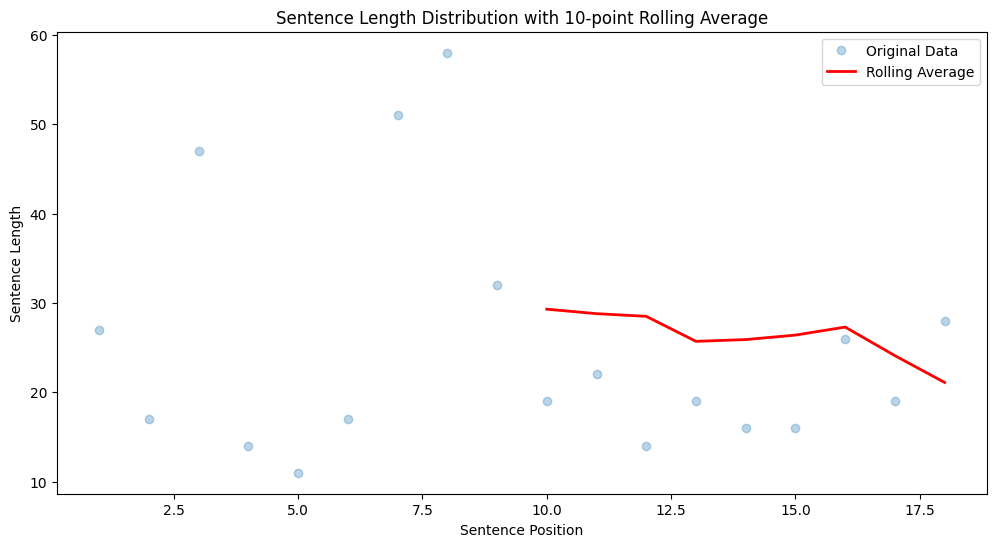

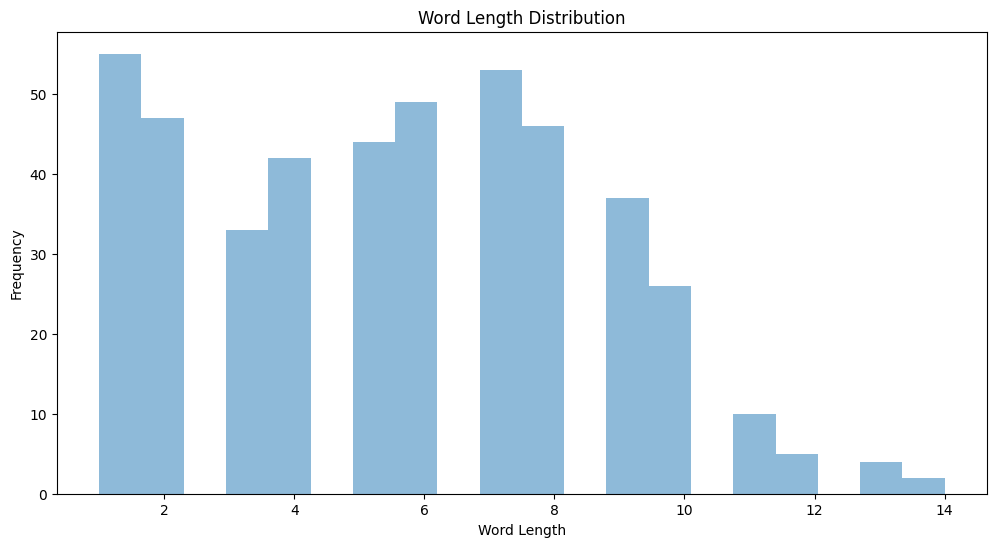

In [4]:
import numpy as np

def rolling_average(data, window):
    return np.convolve(data, np.ones(window), 'valid') / window

def plot_length_distribution(sentences, window=10):
    # Calculate sentence lengths
    sentence_lengths = [len(sentence) for sentence in sentences]
    sentence_positions = range(1, len(sentences) + 1)

    # Calculate rolling average of sentence lengths
    rolling_avg_lengths = rolling_average(sentence_lengths, window)
    rolling_avg_positions = range(window, len(sentences) + 1)

    # Plot sentence length distribution with rolling average
    plt.figure(figsize=(12, 6))
    plt.plot(sentence_positions, sentence_lengths, marker='o', linestyle='', alpha=0.3, label='Original Data')
    plt.plot(rolling_avg_positions, rolling_avg_lengths, marker='', linestyle='-', linewidth=2, color='r', label='Rolling Average')
    plt.xlabel('Sentence Position')
    plt.ylabel('Sentence Length')
    plt.title(f'Sentence Length Distribution with {window}-point Rolling Average')
    plt.legend()

    plt.show()

    # Calculate word lengths
    words = [word for sentence in sentences for word in sentence]
    word_lengths = [len(word) for word in words]

    # Plot word length distribution
    plt.figure(figsize=(12, 6))
    plt.hist(word_lengths, bins=20, alpha=0.5)
    plt.xlabel('Word Length')
    plt.ylabel('Frequency')
    plt.title('Word Length Distribution')

    plt.show()

# Call the functions with your data
sentences = adamofbremen_doc.sentences_tokens
plot_length_distribution(sentences)

,Word,Frequency
0,quod,4
1,eo,3
2,naves,3
3,sunt,3
4,eius,2
...,...,...
302,insulas,1
303,dictum,1
304,supra,1
305,quibus,1


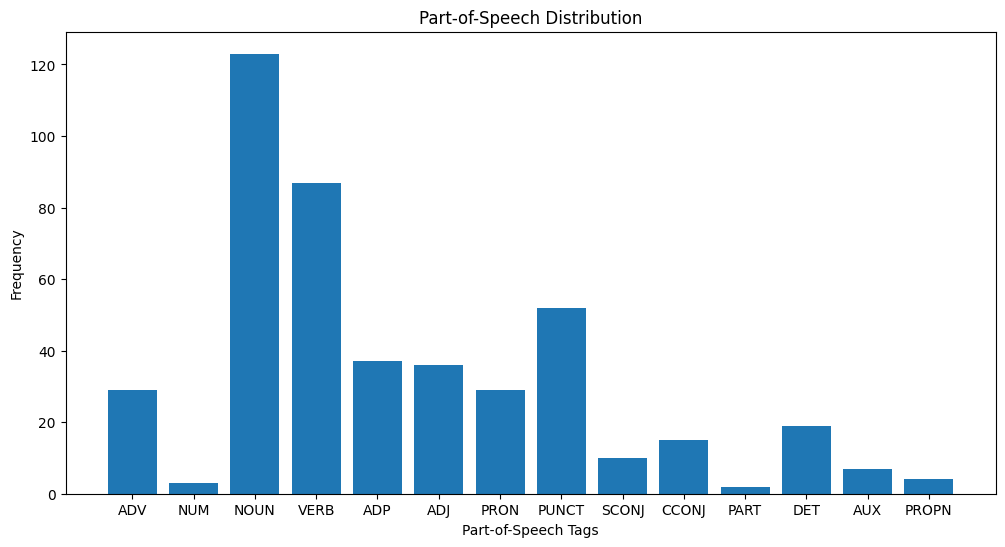

In [6]:
# most common words
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import re
#
sentences=adamofbremen_doc.sentences_strings
words= adamofbremen_doc.sentences_tokens
LATIN_STOPS_LIST = ["ab", "ac", "ad", "adhic", "aliqui", "aliquis", "an", "ante", "apud", "at", "atque", "aut", "autem",
                    "cum", "cur", "de", "deinde", "dum", "ego", "enim", "ergo", "es", "est", "et", "etiam", "etsi", "ex",
                    "fio", "haud", "hic", "iam", "idem", "igitur", "ille", "in", "infra", "inter", "interim", "ipse", "is",
                    "ita", "magis", "modo", "mox", "nam", "ne", "nec", "necque", "neque", "nisi", "non", "nos", "o", "ob",
                    "per", "possum", "post", "pro", "quae", "quam", "quare", "qui", "quia", "quicumque", "quidem",
                    "quilibet", "quis", "quisnam", "quisquam", "quisque", "quisquis", "quo", "quoniam", "sed", "si", "sic",
                    "sive", "sub", "sui", "sum", "super", "suus", "tam", "tamen", "trans", "tu", "tum", "ubi", "uel", "uero"]
# def function

import pandas as pd

def create_word_freq_table(sentences):
    # Remove punctuation and create a single list of words
    words = [re.sub(r'[^\w\s]', '', word) for sentence in sentences for word in sentence]

    # Remove stop words and empty strings
    filtered_words = [word for word in words if word not in LATIN_STOPS_LIST and word != '' and len(word) != 1]

    # Calculate word frequencies
    word_freq_counter = Counter(filtered_words)

    # Create the table with word frequencies
    word_freq_table = pd.DataFrame({"Word": list(word_freq_counter.keys()), "Frequency": list(word_freq_counter.values())})
    word_freq_table.sort_values(by="Frequency", ascending=False, inplace=True)
    word_freq_table.reset_index(drop=True, inplace=True)

    return word_freq_table

sentences = adamofbremen_doc.sentences_tokens
word_freq_table = create_word_freq_table(sentences)
display(word_freq_table)

# POS 
def plot_pos_distribution(pos_tags):
    pos_freq = Counter(pos_tags)
    pos, frequencies = zip(*pos_freq.items())

    plt.figure(figsize=(12, 6))
    plt.bar(pos, frequencies)
    plt.xlabel('Part-of-Speech Tags')
    plt.ylabel('Frequency')
    plt.title('Part-of-Speech Distribution')

    plt.show()

pos_tags = adamofbremen_doc.pos
plot_pos_distribution(pos_tags)

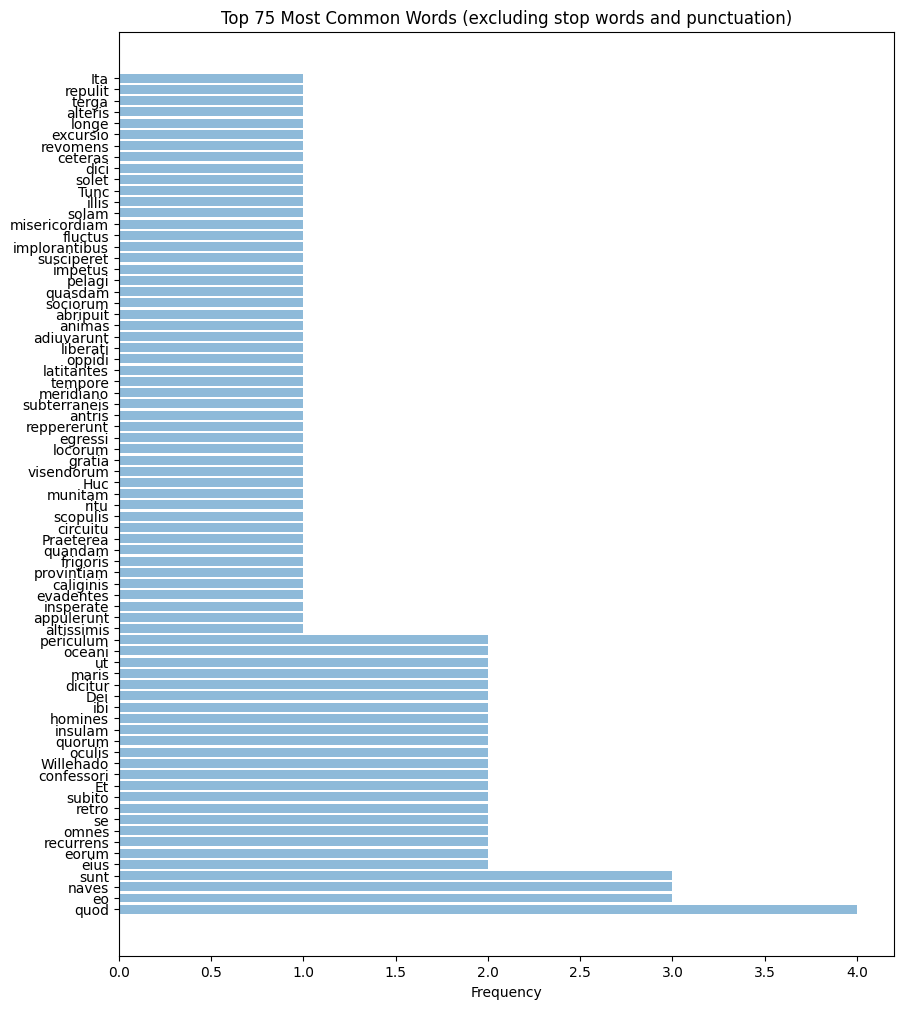

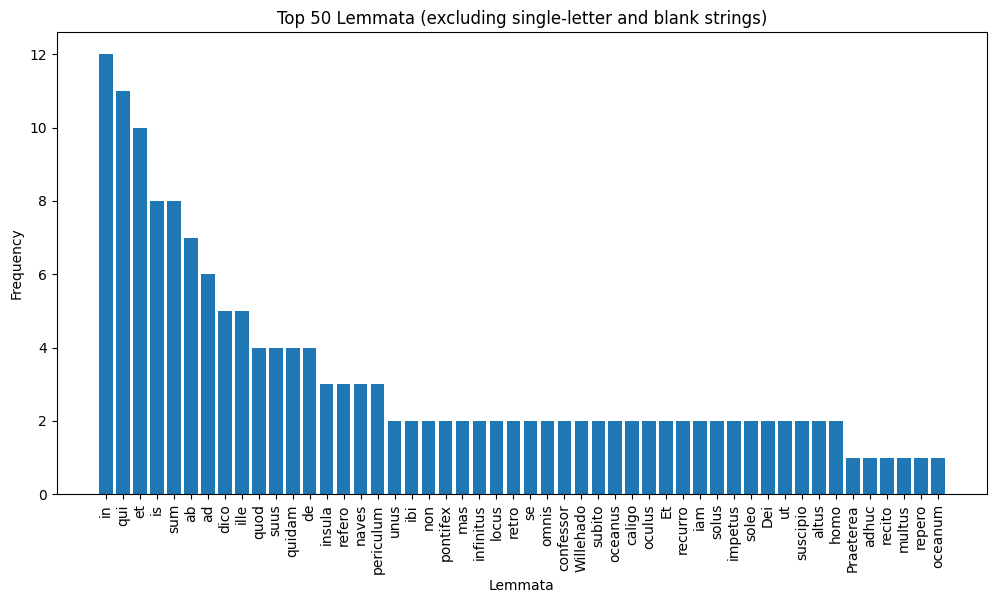

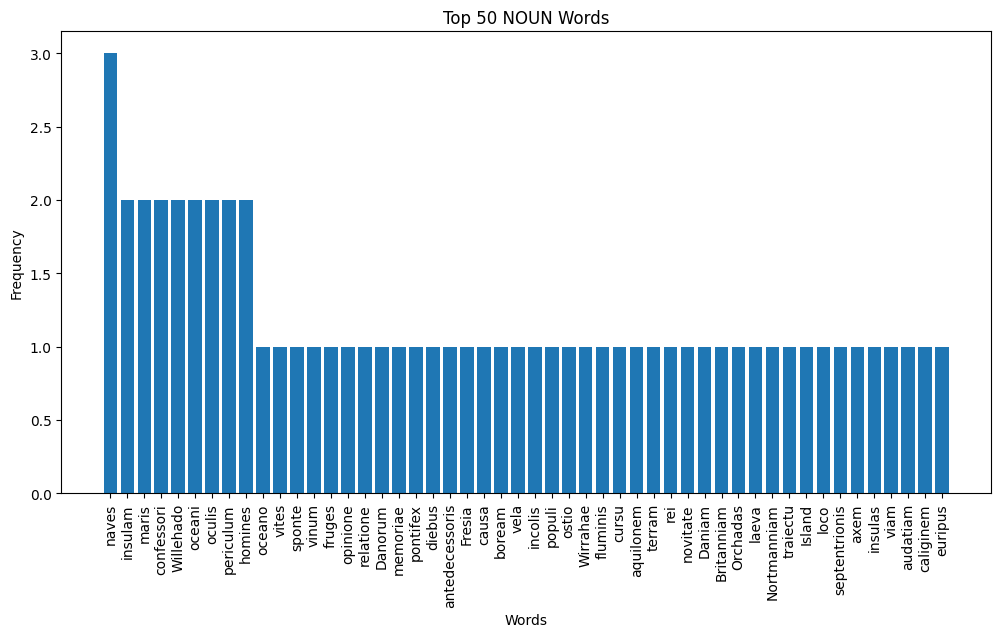

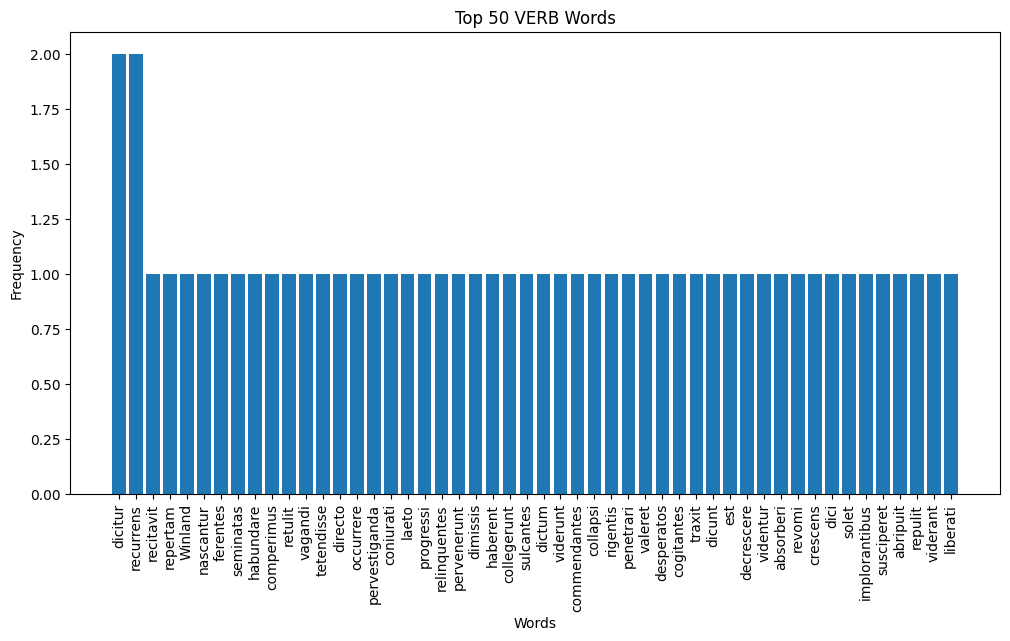

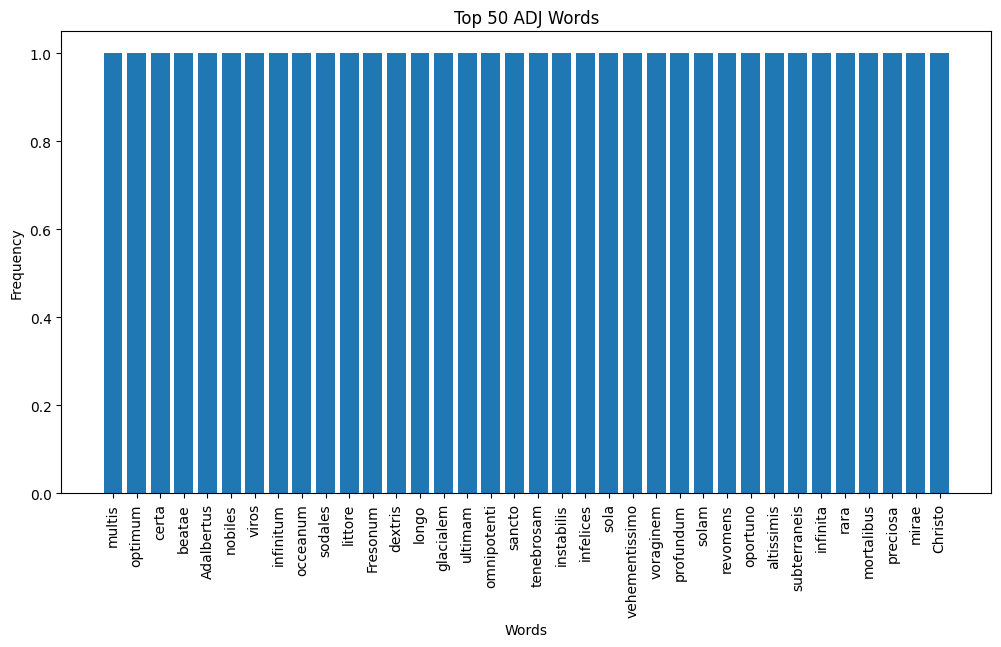

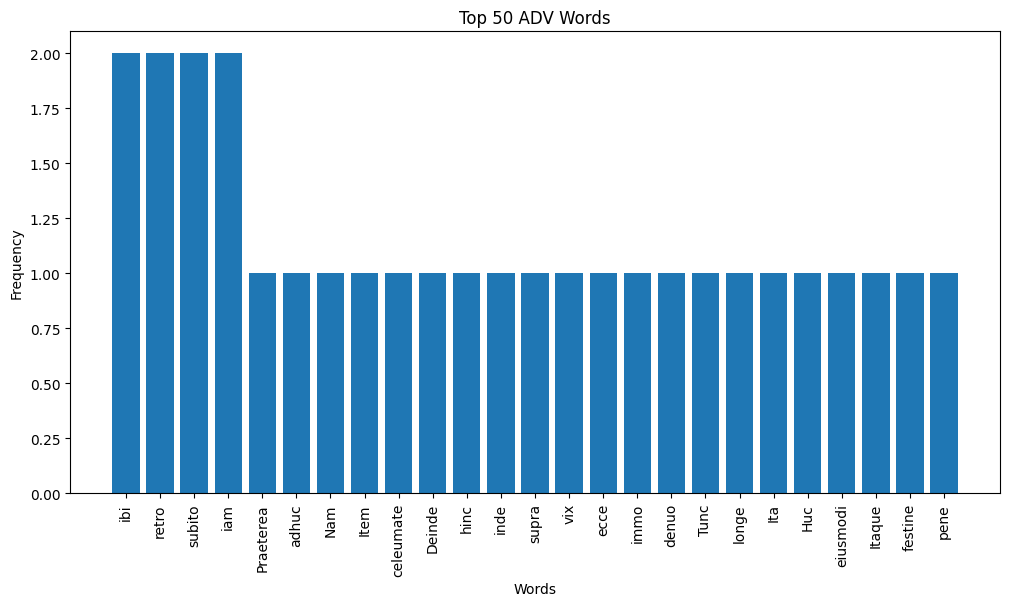

In [8]:

def plot_histogram(word_freq_table, n_most_common=75):
    # Get the top N words and their frequencies
    top_n_words = word_freq_table.head(n_most_common)
    words = top_n_words["Word"]
    frequencies = top_n_words["Frequency"]

    # Plot the histogram of word frequencies
    plt.figure(figsize=(10, 12))
    y_pos = np.arange(len(words))

    plt.barh(y_pos, frequencies, align='center', alpha=0.5)
    plt.yticks(y_pos, words)
    plt.xlabel('Frequency')
    plt.title(f'Top {n_most_common} Most Common Words (excluding stop words and punctuation)')

    plt.show()

# Call the functions with your data
sentences = adamofbremen_doc.sentences_tokens

plot_histogram(word_freq_table)
# lemmata
def plot_top_lemmata(lemmata, n_most_common=50):
    # Filter out single-letter and blank strings
    filtered_lemmata = [lemma for lemma in lemmata if len(lemma) > 1 and lemma.strip() != '']

    lemma_freq = Counter(filtered_lemmata)
    top_lemmata = lemma_freq.most_common(n_most_common)
    lemmata, frequencies = zip(*top_lemmata)

    plt.figure(figsize=(12, 6))
    plt.bar(lemmata, frequencies)
    plt.xlabel('Lemmata')
    plt.ylabel('Frequency')
    plt.title(f'Top {n_most_common} Lemmata (excluding single-letter and blank strings)')
    plt.xticks(rotation=90)

    plt.show()

lemmata = adamofbremen_doc.lemmata
plot_top_lemmata(lemmata)
#Plot top parts of speech
def plot_top_words_by_pos(word_texts, pos_tags, target_pos, n_most_common=50):
    # Filter words by target POS
    filtered_words = [word_text for word_text, pos in zip(word_texts, pos_tags) if pos == target_pos]

    # Calculate word frequencies and select top words
    word_freq = Counter(filtered_words)
    top_words = word_freq.most_common(n_most_common)
    words, frequencies = zip(*top_words)

    # Plot top words for target POS
    plt.figure(figsize=(12, 6))
    plt.bar(words, frequencies)
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Top {n_most_common} {target_pos} Words')
    plt.xticks(rotation=90)

    plt.show()

words = adamofbremen_doc.words
word_texts = [word.string for word in words]
pos_tags = adamofbremen_doc.pos

# Call the function for different POS categories
plot_top_words_by_pos(word_texts, pos_tags, 'NOUN')
plot_top_words_by_pos(word_texts, pos_tags, 'VERB')
plot_top_words_by_pos(word_texts, pos_tags, 'ADJ')
plot_top_words_by_pos(word_texts, pos_tags, 'ADV')
#This function, plot_top_words_by_pos, takes the words, their corresponding POS tags, 
# the target POS category, and the number of most common words to plot. 
#It filters the words based on the target POS category


In [11]:
# morphosyntactic features?
# this seems to be exceptionally computationally intensive. I guess for loops on all tokens will inevitably take long
#i'm adding a progress bar and time stuff

from tqdm import tqdm

from cltk.core.data_types import Word

def extract_morphosyntactic_features_by_pos(adamofbremen_doc, target_pos):
    morphosyntactic_features = {}
    words = adamofbremen_doc.words
    pos_tags = adamofbremen_doc.pos
    for i, (word, pos_tag) in tqdm(enumerate(zip(words, pos_tags)), total=len(words)):
        if pos_tag == target_pos:
            word_str = str(Word(word))
            morphosyntactic_features[word_str] = adamofbremen_doc.morphosyntactic_features[i]
    return morphosyntactic_features


import time

start_time = time.time()
noun_mfeats = extract_morphosyntactic_features_by_pos(adamofbremen_doc, 'NOUN')
end_time = time.time()
print(f"Elapsed time: {end_time - start_time:.2f} seconds")

100%|██████████████████████████████████████████████████████████████████████████████| 453/453 [00:00<00:00, 84818.52it/s]

Elapsed time: 0.01 seconds


In [12]:
import pandas as pd
from cltk.core.data_types import Doc

def subset_pos(adamofbremen_doc):
    pos_dict = {}

    for word in adamofbremen_doc.words:
        pos = str(word.pos)  # Convert POS object to string

        if pos not in pos_dict:
            pos_dict[pos] = []

        pos_dict[pos].append(word)

    return pos_dict

def create_pos_dataframes(adamofbremen_doc):
    pos_subsets = subset_pos(adamofbremen_doc)
    pos_dfs = {}

    for pos, words in pos_subsets.items():
        words_data = []

        for word in words:
            word_data = {
                'index_char_start': word.index_char_start,
                'index_char_stop': word.index_char_stop,
                'index_token': word.index_token,
                'index_sentence': word.index_sentence,
                'string': word.string,
                'pos': word.pos,
                'lemma': word.lemma,
                'stem': word.stem,
                'scansion': word.scansion,
                'xpos': word.xpos,
                'upos': word.upos,
                'dependency_relation': word.dependency_relation,
                'governor': word.governor,
                'category': word.category,
                'stop': word.stop,
                'named_entity': word.named_entity,
                'syllables': word.syllables,
                'phonetic_transcription': word.phonetic_transcription,
                'definition': word.definition
            }

            for feature, value in word.features.items():
                word_data[str(feature)] = str(value[0]) if value else None

            words_data.append(word_data)

        pos_dfs[pos] = pd.DataFrame(words_data)

    return pos_dfs

pos_dataframes = create_pos_dataframes(adamofbremen_doc)
noun_dataframe = pos_dataframes['noun']
adjective_dataframe = pos_dataframes['adjective']
proper_noun_dataframes = pos_dataframes['proper_noun']
Coordconj_dataframes = pos_dataframes['coordinating_conjunction']
particle_dataframe = pos_dataframes['particle']
proper_noun_dataframe = pos_dataframes['proper_noun']
verb_dataframe = pos_dataframes['verb']


In [13]:
def group_words_by_features(df):
    grouped = df.groupby(['Case', 'Gender', 'Number'])['string'].apply(list).reset_index()
    return grouped


def group_words_by_features_V(df):
    grouped = df.groupby(['Mood', 'Number', 'Person','Tense','VerbForm', 'Voice'])['string'].apply(list).reset_index()
    return grouped


grouped_nouns = group_words_by_features(noun_dataframe)
grouped_adjectives = group_words_by_features(adjective_dataframe)
grouped_propernouns = group_words_by_features(proper_noun_dataframes)
grouped_proper_nouns = group_words_by_features(proper_noun_dataframe)
grouped_verbs = group_words_by_features_V(verb_dataframe)

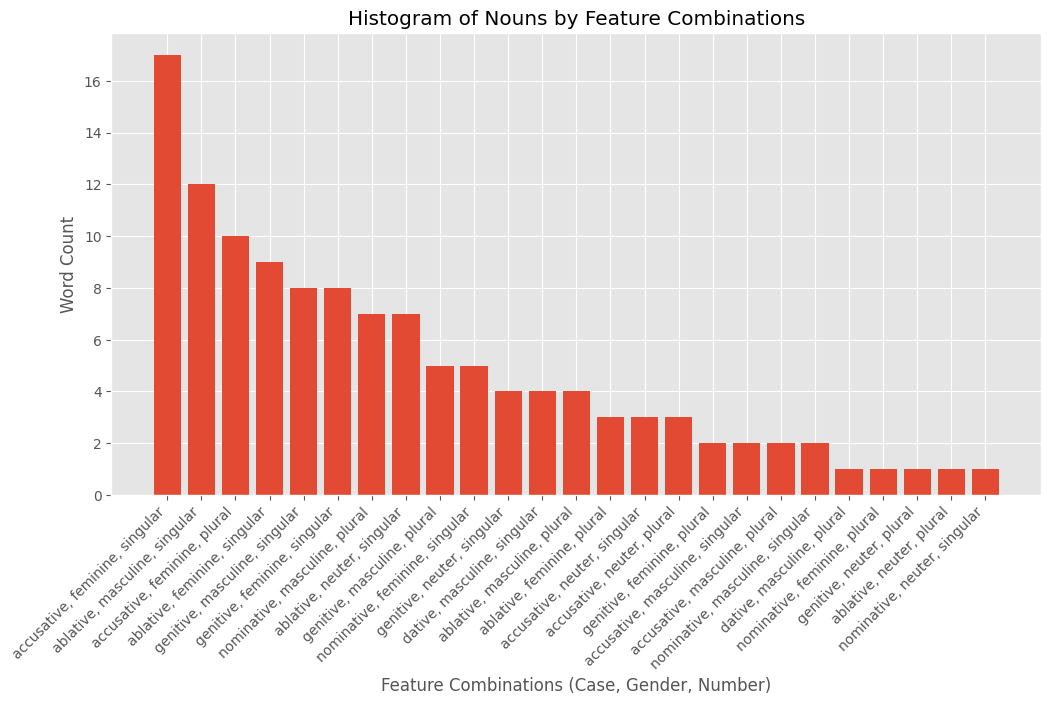

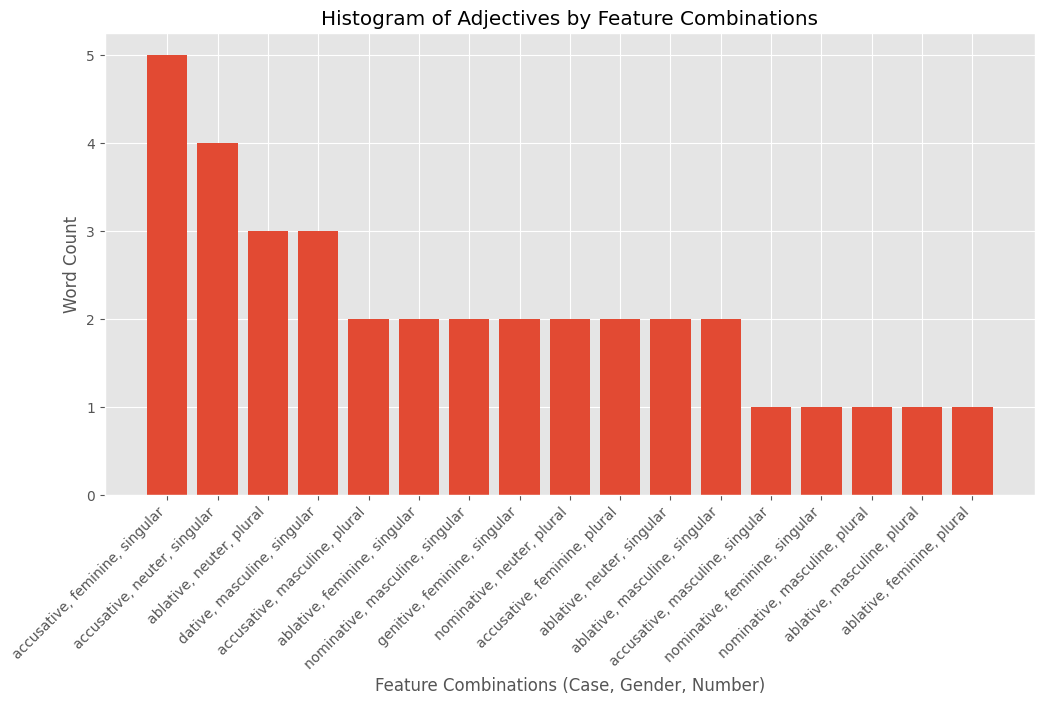

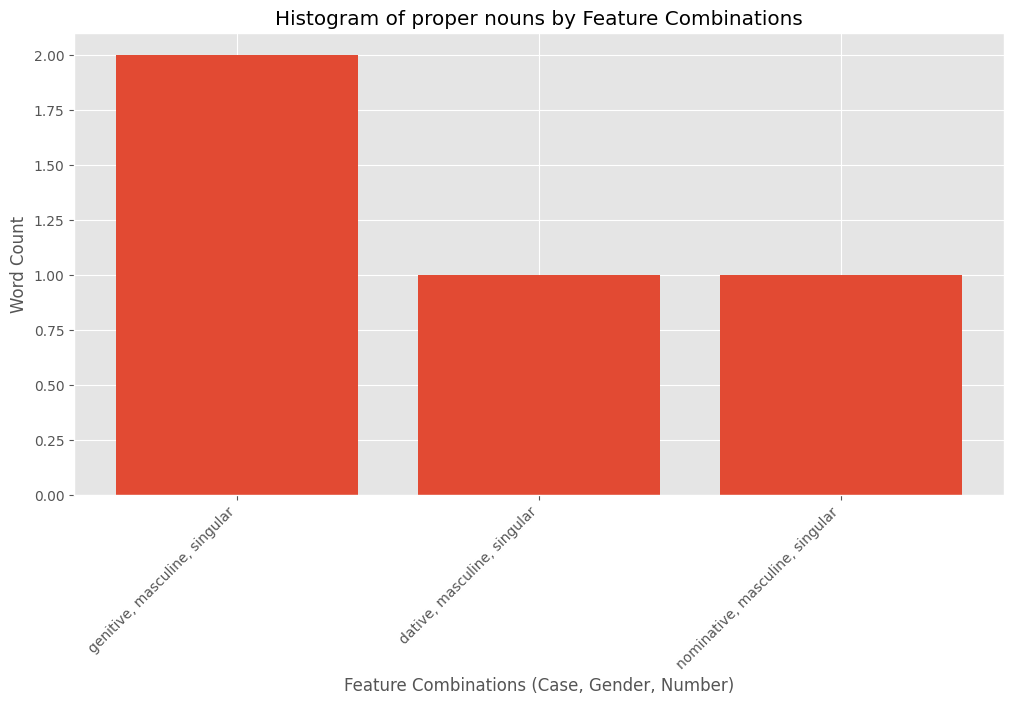

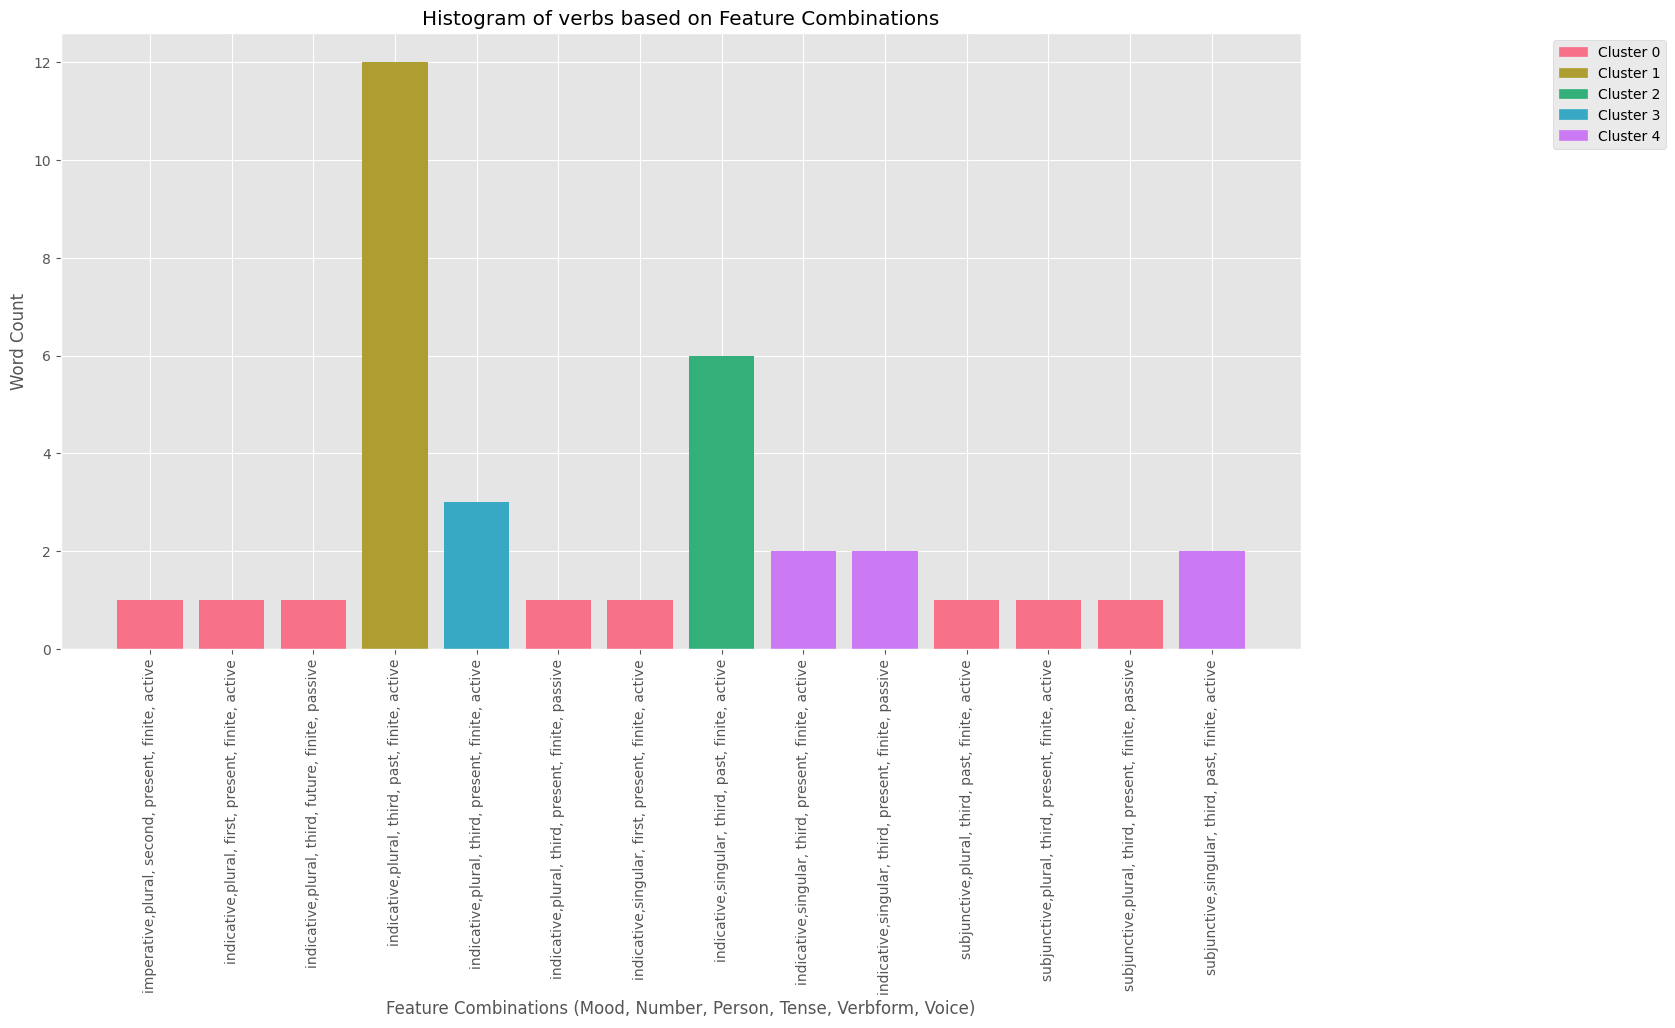

In [19]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
import matplotlib.patches as patches

def plot_histogram(df, pos_type):
    # Calculate word counts for each group
    df['word_count'] = df['string'].apply(len)

    # Create a column that combines Case, Gender, and Number as the label
    df['label'] = df['Case'] + ', ' + df['Gender'] + ', ' + df['Number']

    # Sort the dataframe by word_count in descending order
    df = df.sort_values('word_count', ascending=False)

    # Set the size and style of the plot
    plt.figure(figsize=(12, 6))
    plt.style.use('ggplot')

    # Create the histogram
    plt.bar(df['label'], df['word_count'])
    plt.xlabel('Feature Combinations (Case, Gender, Number)')
    plt.ylabel('Word Count')
    plt.title(f'Histogram of {pos_type} by Feature Combinations')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')

    # Display the histogram
    plt.show()
    
    
def plot_histogram_V(df, pos_type):
    # K-means clustering
    num_clusters = 5  # You can choose the number of clusters based on your preference
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    cluster_labels = kmeans.fit_predict(df[["word_count"]])

    # Assign cluster colors
    palette = sns.color_palette("husl", num_clusters)
    colors = [palette[label] for label in cluster_labels]

    plt.figure(figsize=(16, 8))
    plt.style.use('ggplot')
    plt.bar(df['label'], df['word_count'], color=colors)
    plt.xlabel('Feature Combinations (Mood, Number, Person, Tense, Verbform, Voice)')
    plt.ylabel('Word Count')
    plt.title(f'Histogram of {pos_type} based on Feature Combinations')
    plt.xticks(rotation=90)

    # Create legend
    legend_labels = ['Cluster ' + str(i) for i in range(num_clusters)]
    handles = [plt.Rectangle((0, 0), 1, 1, color=palette[i]) for i in range(num_clusters)]
    plt.legend(handles, legend_labels, loc='upper right', bbox_to_anchor=(1.3, 1))

    plt.show() 
    
plot_histogram(grouped_nouns, 'Nouns')
plot_histogram(grouped_adjectives, 'Adjectives')
plot_histogram(grouped_propernouns, 'proper nouns')
plot_histogram_V(grouped_verbs, 'verbs')


In [35]:
#compass plot axes?

types = len(set([word.string for word in adamofbremen_doc.words]))

tokens = len(adamofbremen_doc.words)
TTR = types / tokens

total_sentence_lengths = sum([len(sentence.words) for sentence in adamofbremen_doc.sentences])
average_sentence_length = total_sentence_lengths / len(adamofbremen_doc.sentences)

print("Type-Token Ratio:", TTR)
print("Average Sentence Length:", round(average_sentence_length))

Type-Token Ratio: 0.7328918322295805
Average Sentence Length: 25
